# BODY FAT DATASET

In [2]:
# body fat data --> linear, lasso, ridge

# which features are significant
# target variable is body fat
# random state = 123

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns


In [10]:
bdf = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\python\bodyfat.csv')


In [12]:
bdf.isnull().sum()[bdf.isnull().sum() > 0]

Series([], dtype: int64)

In [16]:
bdf = bdf.replace({'?':np.nan})

In [18]:
bdf.select_dtypes(include='object').columns

Index([], dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
bdf_train, bdf_test = train_test_split(bdf, random_state=123)

In [22]:
bdf_train_x = bdf_train.iloc[:,1::]
bdf_train_y = bdf_train.iloc[:, 0]

bdf_test_x = bdf_test.iloc[:,1::]
bdf_test_y = bdf_test.iloc[:, 0]

In [24]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(bdf_train_x, bdf_train_y)
linreg.score(bdf_train_x, bdf_train_y)

0.8072771757345796

In [26]:
pred_train_lin = linreg.predict(bdf_train_x)
pred_test_lin = linreg.predict(bdf_test_x)

In [28]:
err_train_lin = bdf_train_y - pred_train_lin
err_test_lin = bdf_test_y - pred_test_lin

<Axes: xlabel='Actual', ylabel='Predicted'>

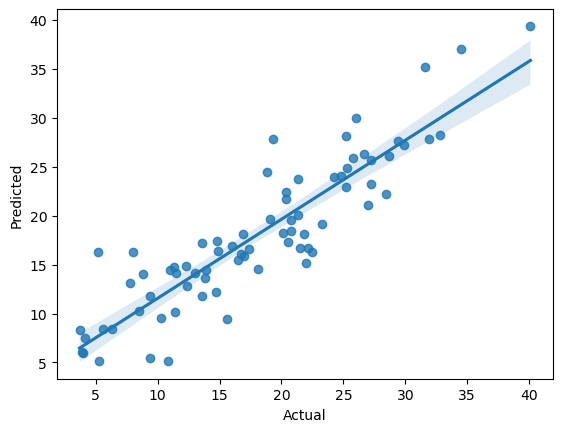

In [34]:

actual_pred = pd.DataFrame()
actual_pred['Actual'] = bdf_train_y
actual_pred['Predicted'] = pred_train_lin


sns.regplot(x = 'Actual' , y = 'Predicted', data = actual_pred)

In [53]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
mean_absolute_percentage_error(bdf_train_y, pred_train_lin)

0.23699185019972338

In [55]:
mean_absolute_percentage_error(bdf_test_y, pred_test_lin)

0.25489473171334526

In [57]:
mse_train = mean_squared_error(bdf_train_y, pred_train_lin)
mse_train

13.234125247612191

In [59]:
mse_test = mean_squared_error(bdf_test_y, pred_test_lin)
mse_test

24.727126919326597

# Lasso

In [62]:
from sklearn.linear_model import Lasso
lass = Lasso()
lass.fit(bdf_train_x, bdf_train_y)
lass.score(bdf_train_x, bdf_train_y)

0.755957199793427

In [64]:
pred_train_lass = lass.predict(bdf_train_x)
pred_test_lass = lass.predict(bdf_test_x)

In [66]:
mean_absolute_percentage_error(bdf_train_y, pred_train_lass)

0.2759625980260922

In [68]:
mean_absolute_percentage_error(bdf_test_y, pred_test_lass)

0.22233650684363185

In [70]:
mse_train_bdf = mean_squared_error(bdf_train_y, pred_train_lass)
mse_train_bdf

16.758227760630003

In [72]:
mse_test_bdf = mean_squared_error(bdf_test_y, pred_test_lass)
mse_test_bdf


18.334583861659354

In [74]:
feat_imp_bdf = pd.DataFrame()
feat_imp_bdf['Feature'] = bdf_train_x.columns
feat_imp_bdf['coef_bdf']= lass.coef_

In [76]:
feat_imp_bdf[feat_imp_bdf.coef_bdf != 0]

,Feature,coef_bdf
0,Age,0.021148
1,Weight,-0.118063
4,Chest,-0.020829
5,Abdomen,0.958537


# Ridge

In [79]:
from sklearn.linear_model import Ridge
rid_bdf = Ridge()
rid_bdf.fit(bdf_train_x,bdf_train_y)
rid_bdf.score(bdf_train_x,bdf_train_y)

0.8071826402143696

In [81]:
pred_train_rid_bdf = rid_bdf.predict(bdf_train_x)
pred_test_rid_bdf = rid_bdf.predict(bdf_test_x)

In [83]:
# MAPE
mean_absolute_percentage_error(bdf_train_y, pred_train_rid_bdf)

0.23770328543889144

In [85]:
# MAPE
mean_absolute_percentage_error(bdf_test_y, pred_test_rid_bdf)

0.2533844776222909

In [87]:

mse_train_rid_bdf = mean_squared_error(bdf_train_y, pred_train_lass)
mse_train_rid_bdf


16.758227760630003

In [89]:
mse_test_rid_bdf = mean_squared_error(bdf_test_y, pred_test_lass)
mse_test_rid_bdf

18.334583861659354

In [91]:
feat_imp_rid_bdf = pd.DataFrame()
feat_imp_rid_bdf['Feature'] = bdf_train_x.columns
feat_imp_rid_bdf['coef_bdf']= rid_bdf.coef_

In [93]:
feat_imp_rid_bdf[feat_imp_rid_bdf != 0]

,Feature,coef_bdf
0,Age,0.130017
1,Weight,0.032165
2,Height,-0.171817
3,Neck,0.086305
4,Chest,-0.322255
5,Abdomen,0.967461
6,Ankle,-0.112133
7,Biceps,0.193476
8,Wrist,-3.059651


In [95]:
feat_imp_rid_bdf.coef_bdf

0    0.130017
1    0.032165
2   -0.171817
3    0.086305
4   -0.322255
5    0.967461
6   -0.112133
7    0.193476
8   -3.059651
Name: coef_bdf, dtype: float64

In [97]:
feat_imp_bdf.coef_bdf

0    0.021148
1   -0.118063
2   -0.000000
3   -0.000000
4   -0.020829
5    0.958537
6   -0.000000
7    0.000000
8   -0.000000
Name: coef_bdf, dtype: float64